In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [30]:
# read csv file
imported_data = pd.read_csv('merged.csv')
imported_data = imported_data.dropna()

In [31]:
# separate dependent/independent variables
date_columns = [col for col in imported_data.columns if col.startswith('1/') or col.startswith('2/') or col.startswith('3/') or col.startswith('4/') or col.startswith('5/') or col.startswith('6/') or col.startswith('7/') or col.startswith('8/') or col.startswith('9/') or col.startswith('10/') or col.startswith('11/') or col.startswith('12/')]
dependent_var = ['house_price']
independent_vars = ['num_beds', 'num_baths', 'area', 'tax_ass_val', 'latitude', 'longitude'] + date_columns

In [32]:
# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(
    imported_data[independent_vars],
    imported_data[dependent_var],
    test_size=0.2,
    random_state=42
)

In [33]:
import pickle

# create linear regression model object
model = LinearRegression()
# train the model on the training data
model.fit(X_train, y_train)
# make predictions on the test data
y_pred = model.predict(X_test)
# evaluate the model's preformance on the testing data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean squared error: {mse:.2f}')
print(f'R2 score: {r2:.2f}')

with open('real_estate_model.pickle', 'wb') as f:
    pickle.dump(model, f)

Mean squared error: 15159204592.17
R2 score: 0.94


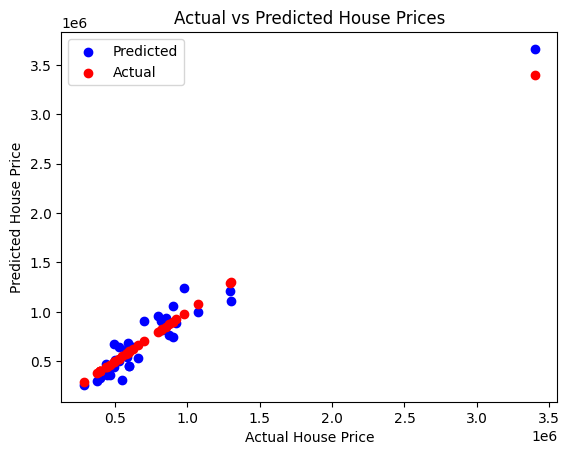

In [34]:
# Predict house prices for the test set
y_pred = model.predict(X_test)

# Plot predicted and actual values
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()